# Lab 7

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Salary_Data (1).csv')

In [ ]:
df.head()

,age,income
0,25,69343
1,28,66205
2,30,57731
3,29,63525
4,31,69891


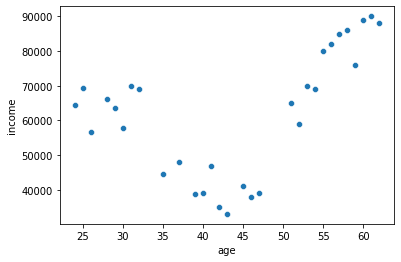

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='age', y='income')

In [ ]:
r = [df['age'].min(), df['age'].max()]
r2 = [df['income'].min(), df['income'].max()]

In [ ]:
import random
from random import randint

a1 = randint(r[0], r[1])
a2 = randint(r[0], r[1])
a3 = randint(r[0], r[1])

i1 = randint(r2[0], r2[1])
i2 = randint(r2[0], r2[1])
i3 = randint(r2[0], r2[1])

In [ ]:
a1,i1

(31, 84917)

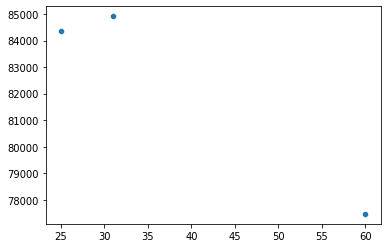

In [ ]:
sns.scatterplot(x=[a1,a2,a3],y=[i1,i2,i3])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.values)

In [ ]:
df['cluster'] = kmeans.labels_

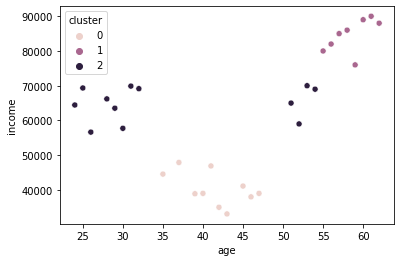

In [ ]:
sns.scatterplot(data=df, x='age', y='income', hue='cluster')

In [ ]:
from sklearn.utils import shuffle
df_shuffle = shuffle(df)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_shuffle.values)

In [ ]:
df_shuffle['cluster'] = kmeans.labels_

In [ ]:
# df_shuffle

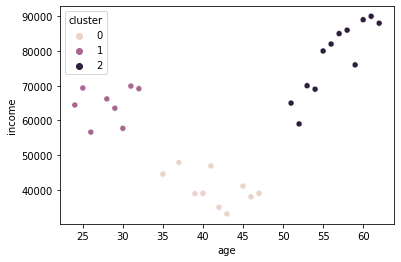

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.values
X = scaler.fit_transform(X)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='age', y='income', hue='cluster')

In [ ]:
import pandas as pd
df_bev = pd.read_csv('/content/bev.csv')

In [ ]:
df_bev.head()

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()
X = df_bev.iloc[:,1:].values
X = scaler.fit_transform(X)
df_bev_scaled = pd.DataFrame(X, columns=df_bev.columns[1:])
df_bev_scaled.insert(loc=0, column='Name', value=df_bev['Name'])

In [ ]:
scaler = RobustScaler()
X = df_bev.iloc[:,1:].values
X = scaler.fit_transform(X)
df_bev_scaled_robust = pd.DataFrame(X, columns=df_bev.columns[1:])
df_bev_scaled_robust.insert(loc=0, column='Name', value=df_bev['Name'])

In [ ]:
# df_bev_scaled_robust

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_bev.iloc[:,1:].values)
df_bev['cluster_no_scaling'] = kmeans.labels_

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(df_bev.iloc[:,1:].values)
df_bev['cluster_no_scaling_agglo'] = clustering.labels_

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_bev_scaled.iloc[:,1:])
df_bev_scaled['cluster'] = kmeans.labels_
print(kmeans.cluster_centers_)

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(df_bev_scaled.iloc[:,1:])
df_bev_scaled['cluster_agglo'] = clustering.labels_

[[-0.92065895 -0.6352664  -0.86290041 -0.33288365]
 [ 0.5361335   0.96264295  0.51632566 -0.61618888]
 [ 0.7690509  -0.6547531   0.69314951  1.89814505]]


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_bev_scaled_robust.iloc[:,1:].values)
df_bev_scaled_robust['cluster_robust'] = kmeans.labels_

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(df_bev_scaled_robust.iloc[:,1:].values)
df_bev_scaled_robust['cluster_robust_agglo'] = clustering.labels_

In [ ]:
df_bev_scaled_robust

,Name,Potassium,Sodium,Caffeine,Cost,cluster_robust,cluster_robust_agglo
0,new_england_coffee,0.000,0.000000,0.137931,-0.086957,0,0
1,post_alley_blend,0.175,0.421053,0.413793,-0.086957,0,0
2,stumpdown_coffee,0.325,0.000000,-5.103448,0.782609,2,2
3,bizzy_organic_coffee,0.650,-0.842105,0.827586,5.130435,1,1
4,indian_bean,0.200,-0.421053,0.551724,5.826087,1,1
5,jacobs_coffee,0.025,0.842105,0.000000,-2.695652,0,0
6,grounds_hounds_coffee,0.775,0.947368,1.241379,-0.608696,0,0
7,la_columbe_corisca,0.125,1.263158,0.137931,-0.260870,0,0
8,lavazza_super_crema,-1.125,-0.526316,-0.413793,-0.086957,0,0
9,mount_hagen,-0.775,-0.736842,-1.241379,-0.608696,0,0


In [ ]:
# df_bev

In [ ]:
# from sklearn.preprocessing import StandardScaler, RobustScaler
# # scaler = StandardScaler()
# # X = df_bev.iloc[:,1:].values
# # X = scaler.fit_transform(X)
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=0).fit(df_bev_scaled.iloc[:,1:])
# df_bev_scaled['cluster'] = kmeans.labels_
# print(kmeans.cluster_centers_)

# from sklearn.cluster import AgglomerativeClustering
# clustering = AgglomerativeClustering(n_clusters=3).fit(df_bev_scaled.iloc[:,1:])
# df_bev_scaled['cluster_agglo'] = clustering.labels_

In [ ]:
# df_bev_scaled

In [ ]:
# df_bev.head()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df_bev.iloc[:,1:5].values)
df_new = pd.DataFrame(X, columns=['PCA1', 'PCA2'])
X_scaled = pca.fit_transform(df_bev_scaled.iloc[:,1:5].values)
df_new_scaled = pd.DataFrame(X_scaled, columns=['PCA1', 'PCA2'])
X_scaled_robust = pca.fit_transform(df_bev_scaled_robust.iloc[:,1:5].values)
df_new_scaled_robust = pd.DataFrame(X_scaled_robust, columns=['PCA1', 'PCA2'])

In [ ]:
df_new['cluster'] = df_bev['cluster_no_scaling']
df_new['cluster_agglo'] = df_bev['cluster_no_scaling_agglo']

df_new_scaled['cluster'] = df_bev_scaled['cluster']
df_new_scaled['cluster_agglo'] = df_bev_scaled['cluster_agglo']

df_new_scaled_robust['cluster'] = df_bev_scaled_robust['cluster_robust']
df_new_scaled_robust['cluster_agglo'] = df_bev_scaled_robust['cluster_robust_agglo']

In [ ]:

# sns.scatterplot(data=df_new, x='PCA1', y='PCA2', hue=col, style=col, palette=sns.color_palette("husl", 3))

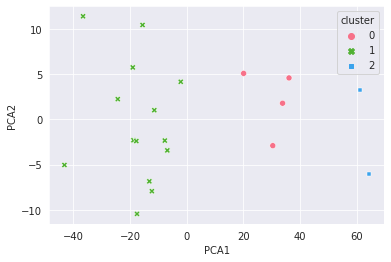

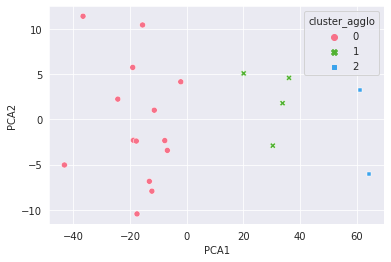

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
for col in df_new.columns[2:]:
  sns.scatterplot(data=df_new, x='PCA1', y='PCA2', hue=col, style=col, palette=sns.color_palette("husl", 3))
  plt.show()

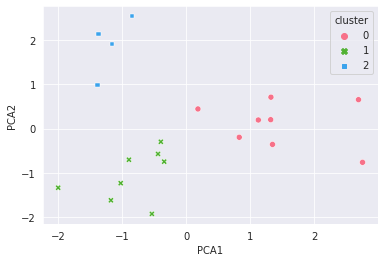

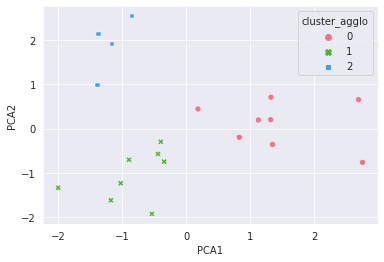

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
for col in df_new.columns[2:]:
  sns.scatterplot(data=df_new_scaled, x='PCA1', y='PCA2', hue=col, style=col, palette=sns.color_palette("husl", 3))
  plt.show()

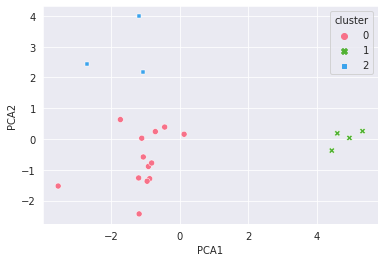

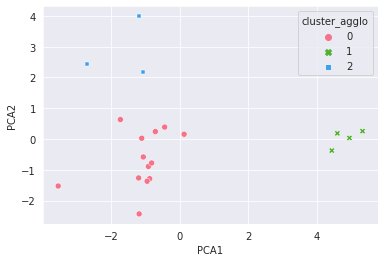

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
for col in df_new.columns[2:]:
  sns.scatterplot(data=df_new_scaled_robust, x='PCA1', y='PCA2', hue=col, style=col, palette=sns.color_palette("husl", 3))
  plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df_bev.iloc[:,1:5].values)
df_new = pd.DataFrame(X, columns=['PCA1', 'PCA2'])
df_new['cluster'] = df_bev['cluster']
df_new['cluster_agglo'] = df_bev['cluster_agglo']
df_new['cluster_no_scaling'] = df_bev['cluster_no_scaling']
df_new['cluster_no_scaling_agglo'] = df_bev['cluster_no_scaling_agglo']

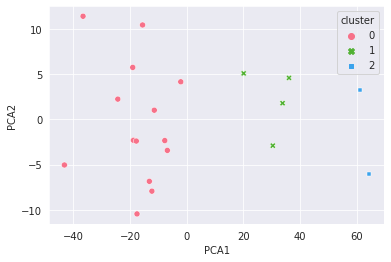

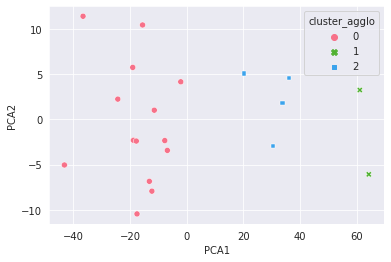

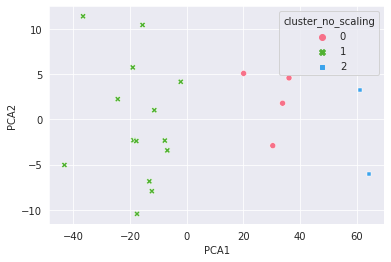

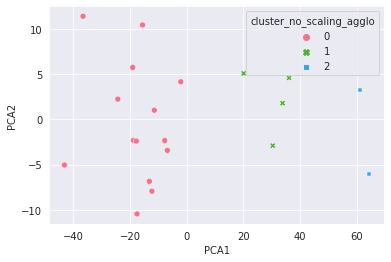

In [ ]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
for col in df_new.columns[2:]:
  sns.scatterplot(data=df_new, x='PCA1', y='PCA2', hue=col, style=col, palette=sns.color_palette("husl", 3))
  plt.show()

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
sns.color_palette("husl", 3)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]